<a href="https://colab.research.google.com/github/subu2000-sm/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading Files

In [ ]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Missing Values

In [ ]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_na:
  print(feature, np.round(df[feature].isnull().mean(),4))

LotFrontage 0.1774
Alley 0.9377
MasVnrType 0.0055
MasVnrArea 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
FireplaceQu 0.4726
GarageType 0.0555
GarageYrBlt 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


Affect of Missing Values on response

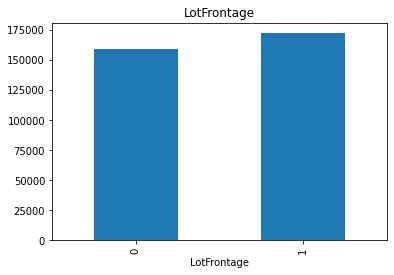

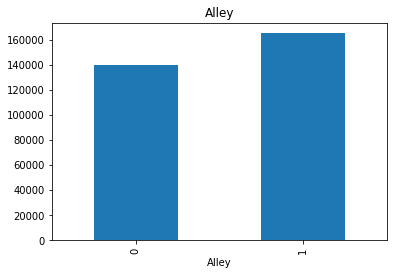

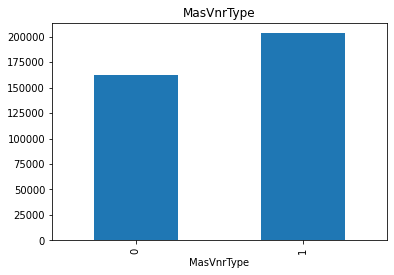

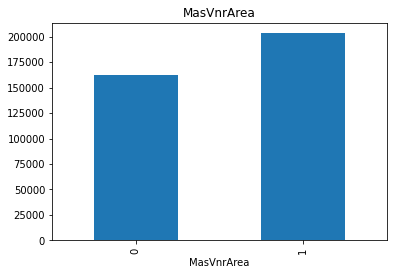

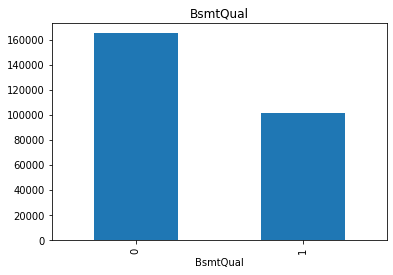

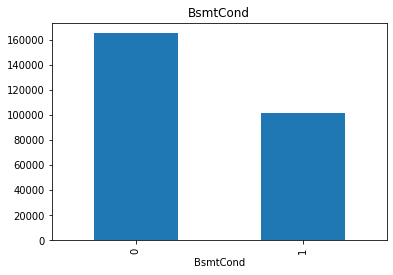

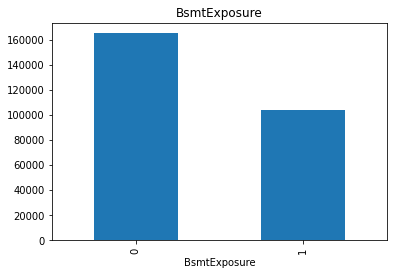

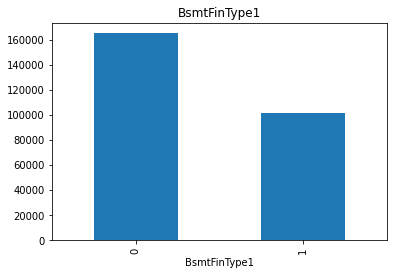

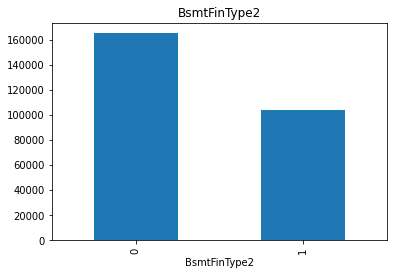

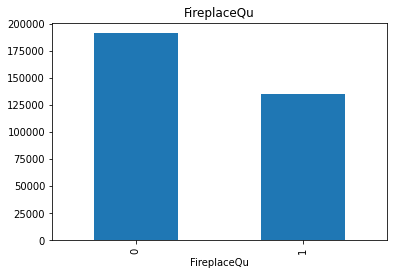

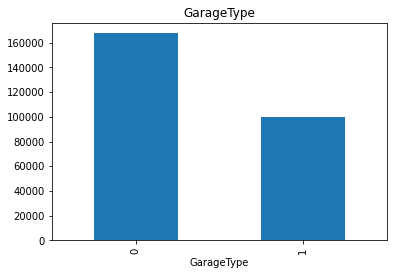

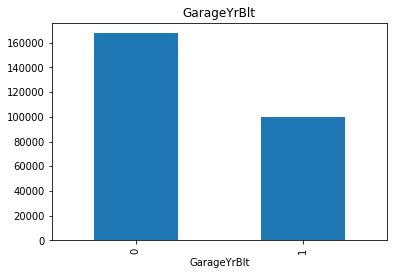

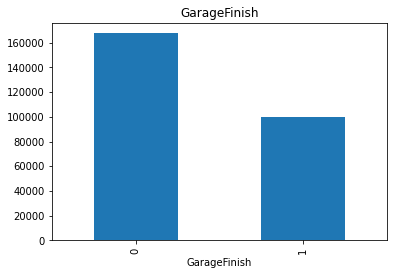

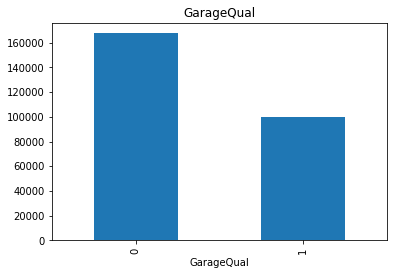

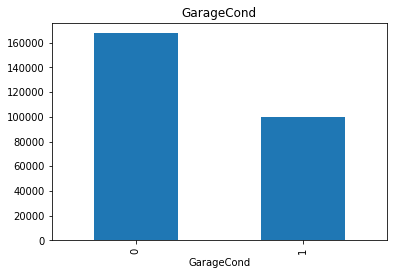

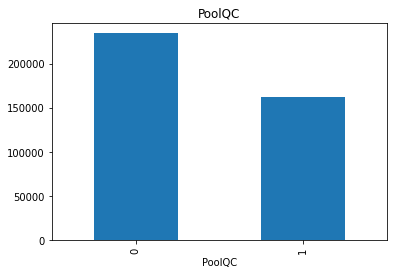

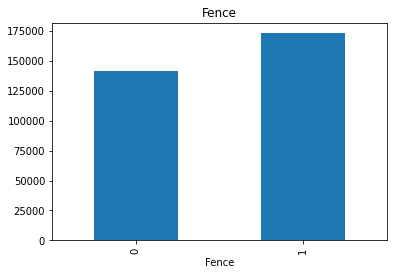

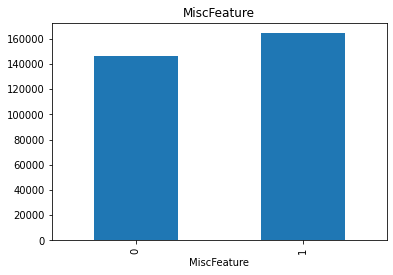

In [ ]:
for feature in feature_na:
  d=df.copy()
  d[feature]=np.where(d[feature].isnull(),1,0)
  d.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

In [ ]:
df[feature_na].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [ ]:
date=[feature for feature in num if 'Yr' in feature or 'Year' in feature]
df[date].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


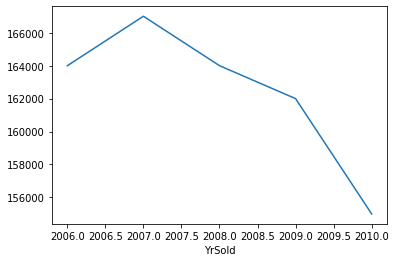

In [ ]:
df.groupby('YrSold')['SalePrice'].median().plot()

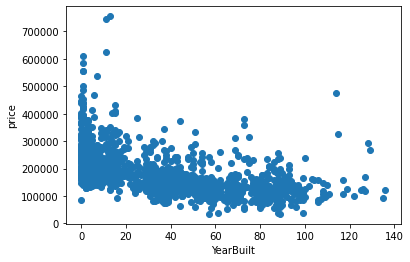

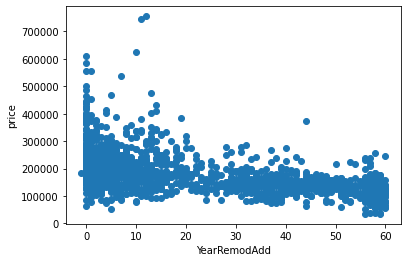

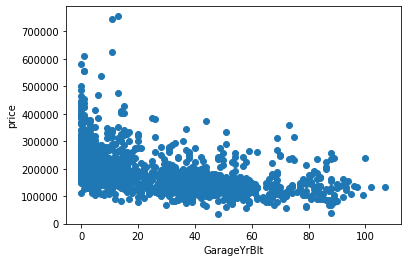

In [ ]:
for feature in date:
  if feature!='YrSold':
    d=df.copy()
    d[feature]=d['YrSold']-d[feature]
    plt.scatter(d[feature],d['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()

In [ ]:
dis=[feature for feature in num if len(df[feature].unique())<25 and feature not in date and ['id']]
df[dis].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


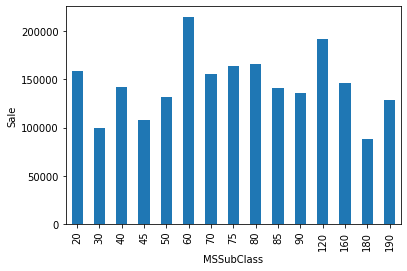

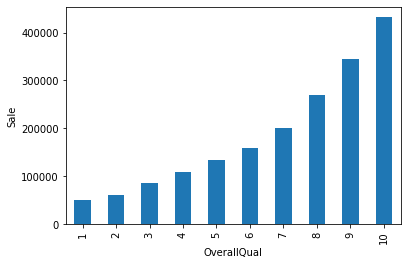

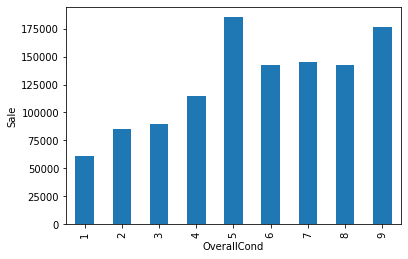

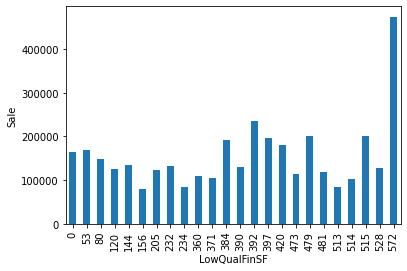

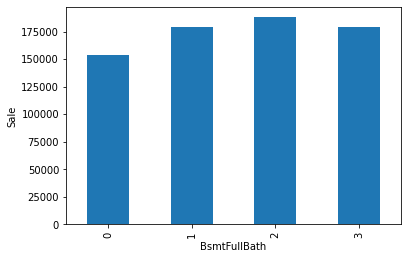

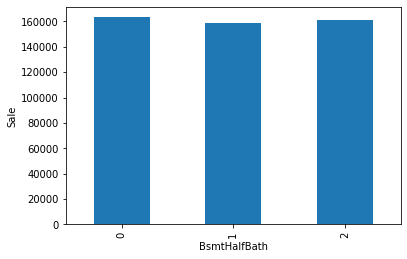

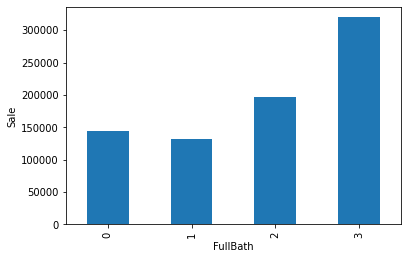

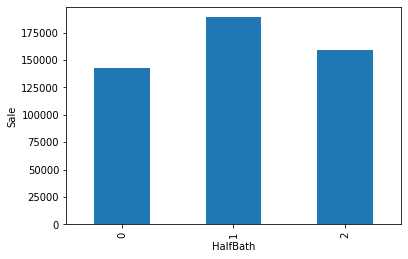

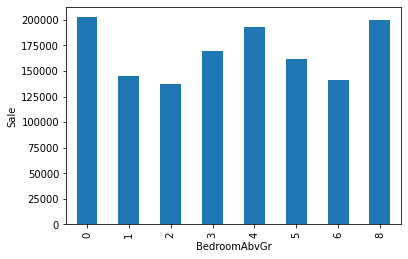

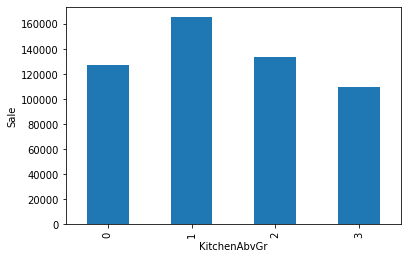

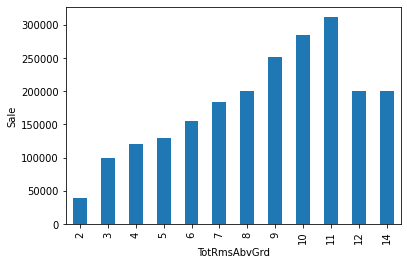

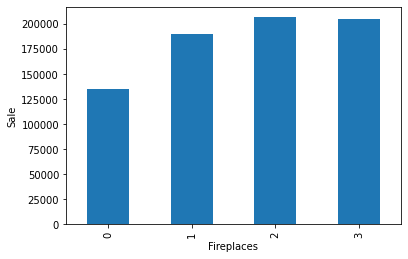

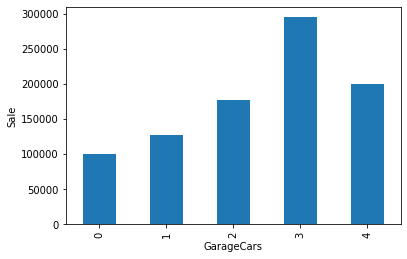

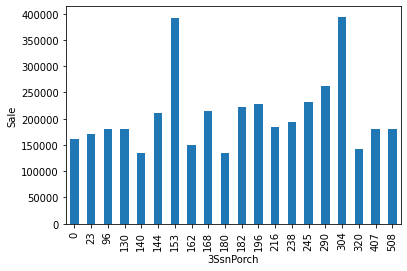

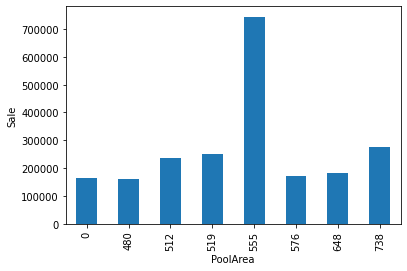

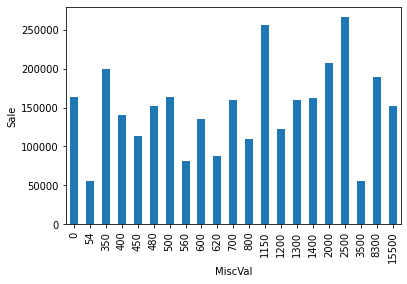

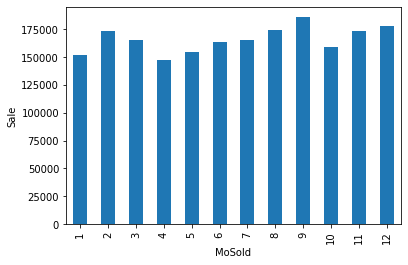

In [ ]:
for feature in dis:
  d=df.copy()
  d.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Sale')
  plt.show()

In [ ]:
con=[feature for feature in num if feature not in ['Id']+date+dis]
df[con].head()
count=len(con)
print(len(con))

16


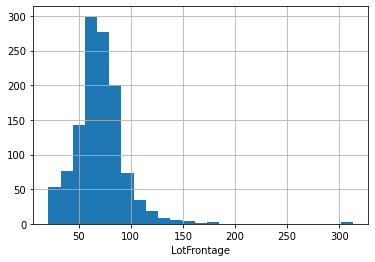

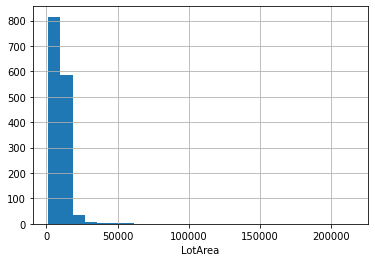

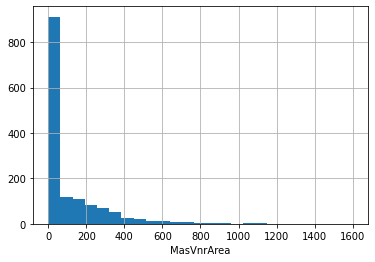

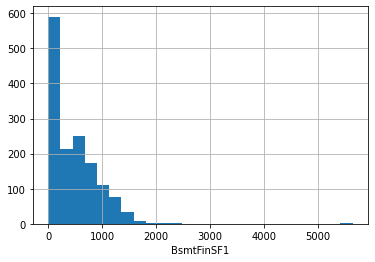

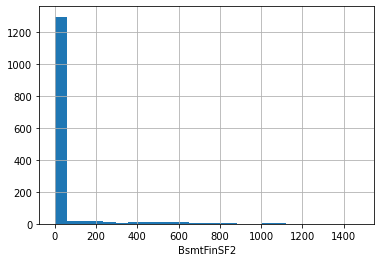

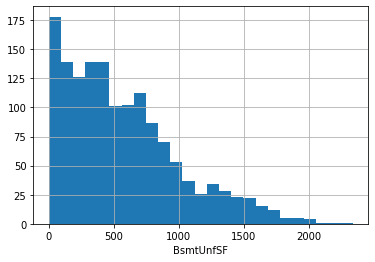

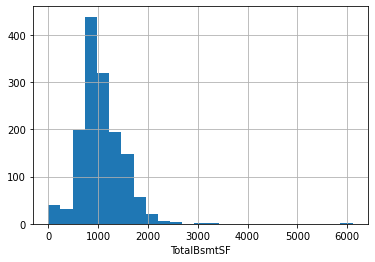

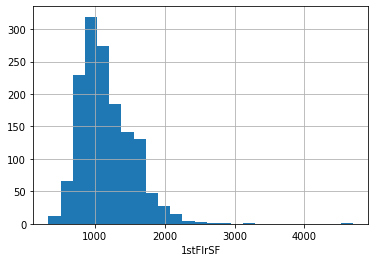

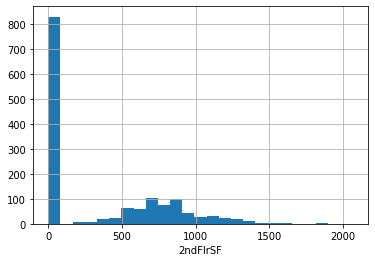

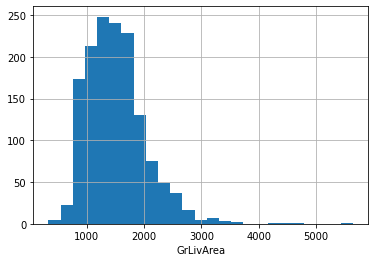

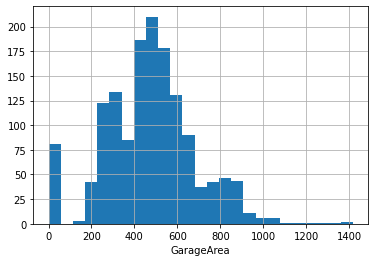

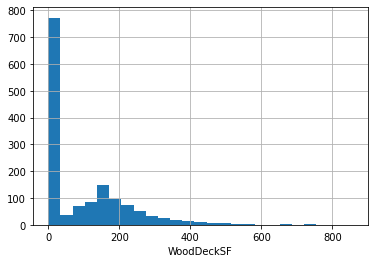

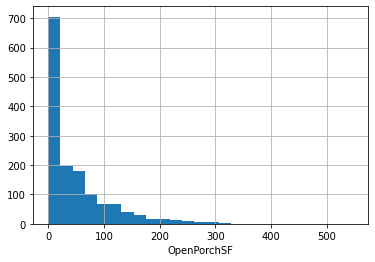

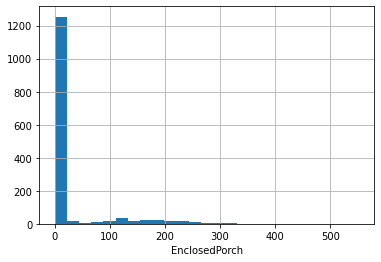

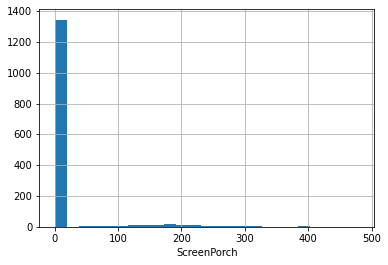

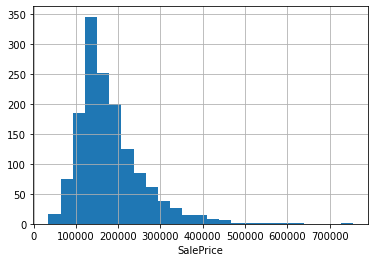

In [ ]:
for feature in con:
  d=df.copy()
  d[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.show()

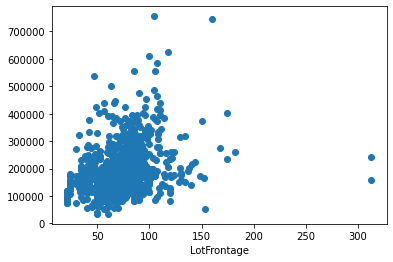

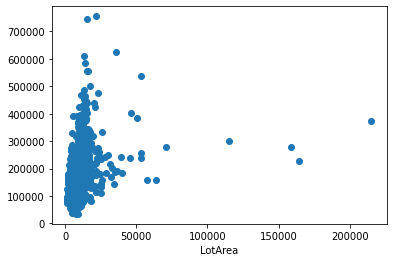

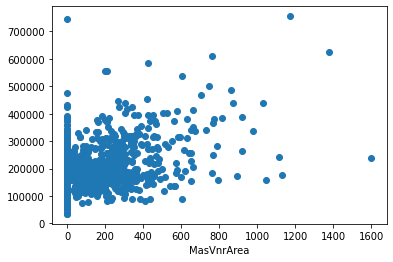

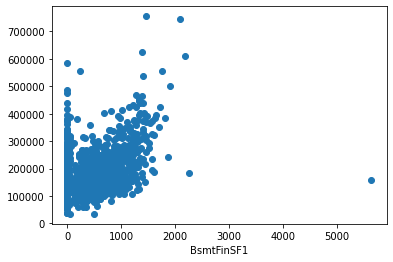

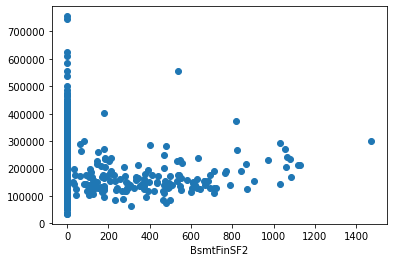

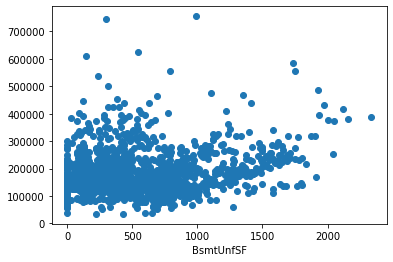

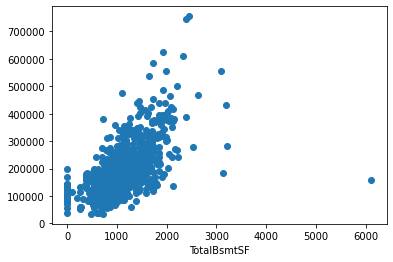

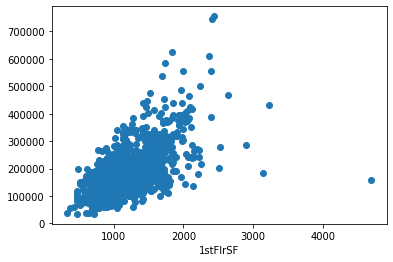

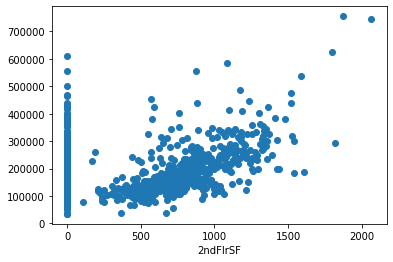

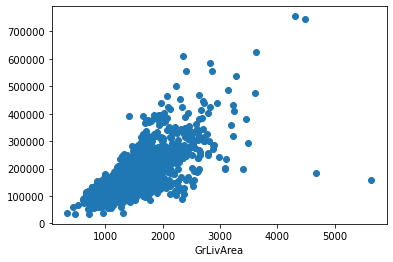

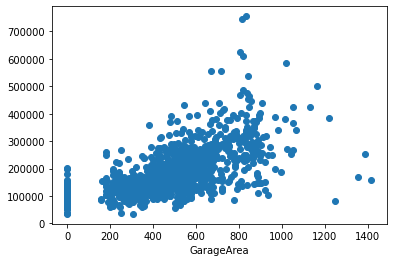

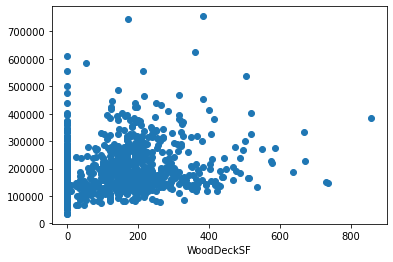

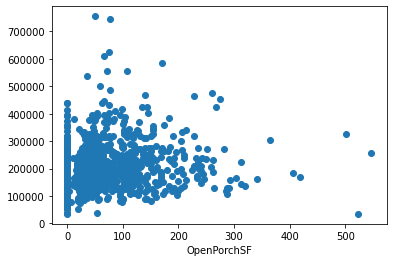

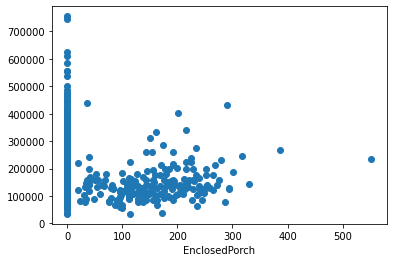

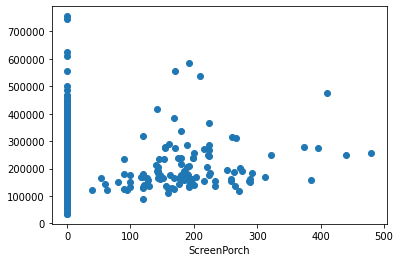

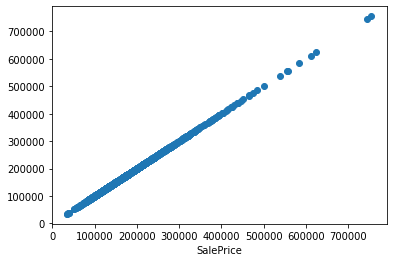

In [ ]:
for feature in con:
  d=df.copy()
  plt.scatter(d[feature],d['SalePrice'])
  plt.xlabel(feature)
  plt.show()

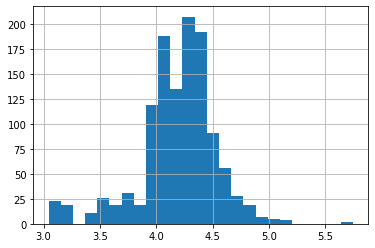

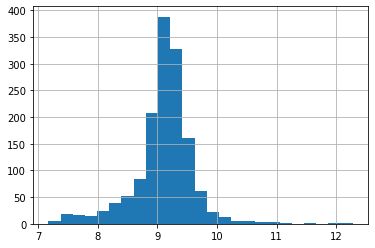

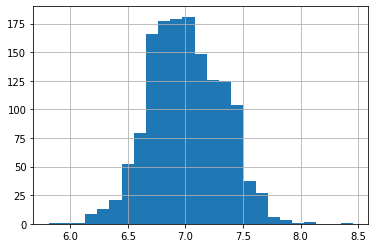

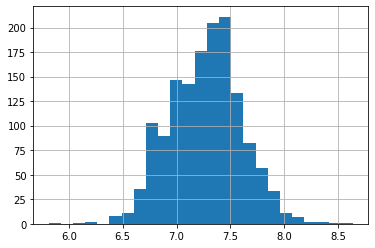

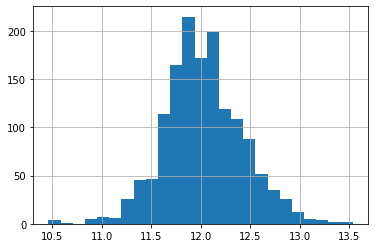

In [ ]:
for feature in con:
  d=df.copy()
  if 0 in d[feature].unique():
    pass
  else:
   
    d[feature]=np.log(d[feature])
    d[feature].hist(bins=25)
    plt.show()

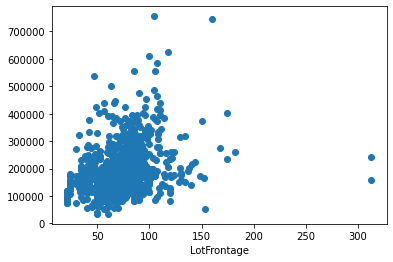

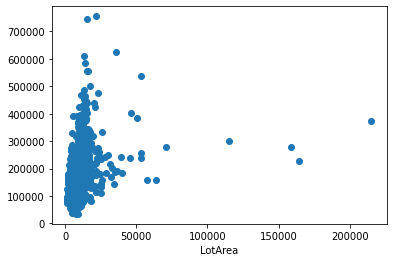

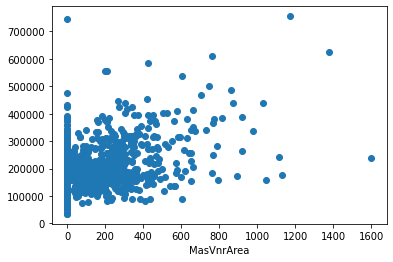

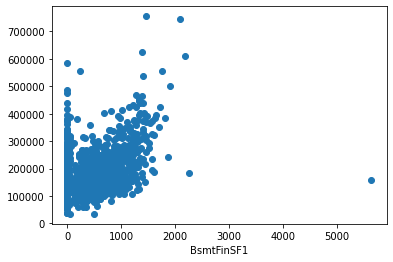

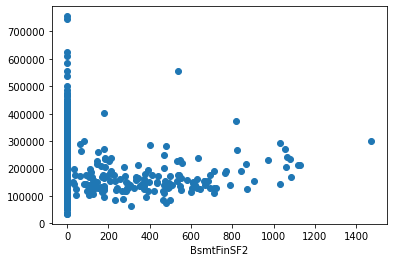

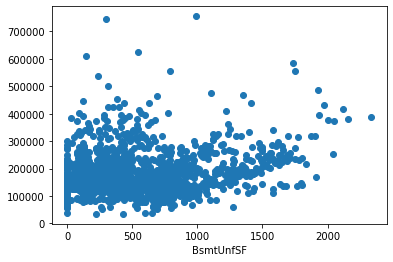

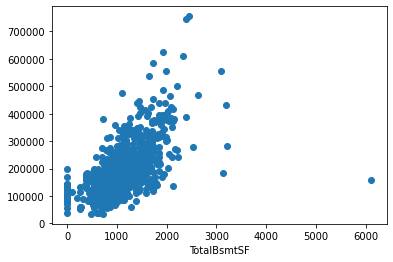

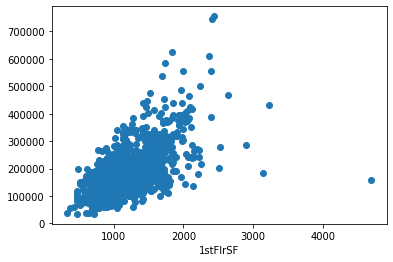

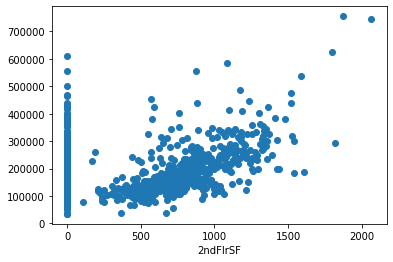

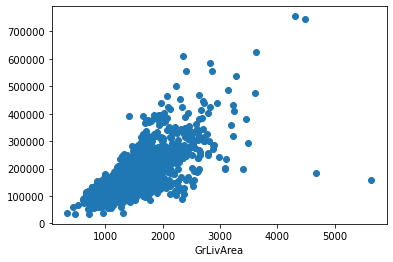

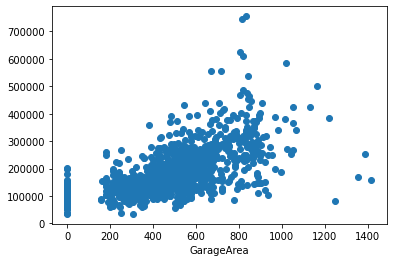

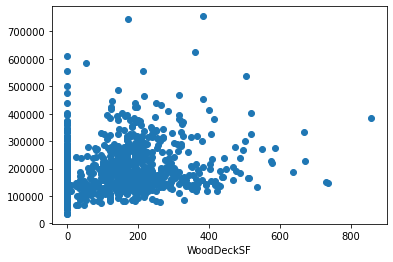

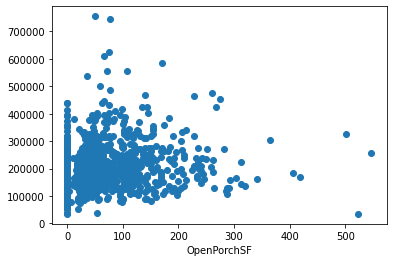

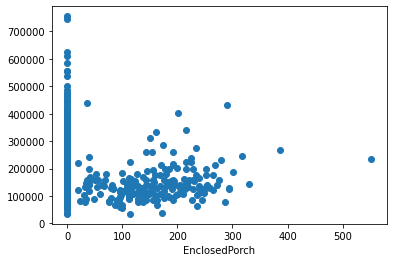

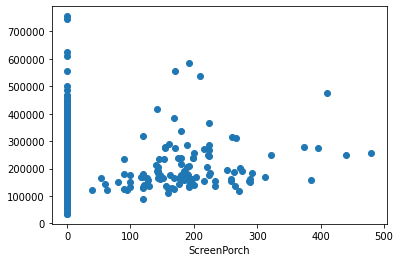

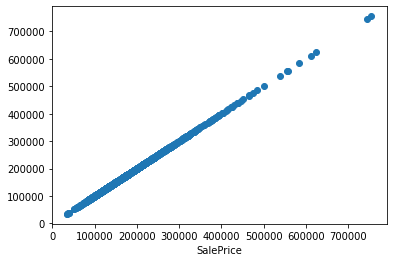

In [ ]:
for feature in con:
  d=df.copy()
  plt.scatter(d[feature],d['SalePrice'])
  plt.xlabel(feature)
  plt.show()

Finding Outliers

In [ ]:
def outlier(data):
  l=[]
  m=data.mean()
  s=data.std()
  for i in data:
    z=(i-m)/s
    if z>3:
      l.append(i)
  print(l)

In [ ]:

for feature in con:
    d=df.copy()
    print(feature)
    outlier(d[feature])


LotFrontage
[174.0, 174.0, 150.0, 144.0, 149.0, 313.0, 168.0, 182.0, 160.0, 152.0, 313.0, 153.0]
LotArea
[50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200]
MasVnrArea
[650.0, 1031.0, 1115.0, 768.0, 1129.0, 664.0, 653.0, 748.0, 922.0, 1600.0, 870.0, 650.0, 772.0, 921.0, 762.0, 660.0, 1170.0, 651.0, 894.0, 673.0, 860.0, 1047.0, 816.0, 760.0, 975.0, 660.0, 1378.0, 766.0, 788.0, 796.0, 705.0, 731.0]
BsmtFinSF1
[1880, 1904, 2260, 2188, 2096, 5644]
BsmtFinSF2
[668, 712, 869, 670, 1080, 768, 712, 580, 690, 692, 1063, 620, 820, 1474, 544, 531, 539, 713, 1120, 532, 1127, 645, 551, 606, 612, 723, 551, 1057, 630, 764, 539, 1085, 823, 634, 841, 1061, 682, 557, 791, 547, 600, 1031, 906, 608, 661, 972, 546, 872, 627, 1029]
BsmtUnfSF
[1907, 2336, 2121, 2153, 1969, 2042, 2046, 1935, 1926, 1905, 2002]
TotalBsmtSF
[2392, 3206, 3094, 3200, 3138, 2444, 2524, 2396, 6110, 2633]
1stFlrSF
[2392, 2402, 3228, 3138, 2515, 2444, 2364, 2898, 2524, 2411, 4692, 2633]
2ndF

Plotting the Outliers

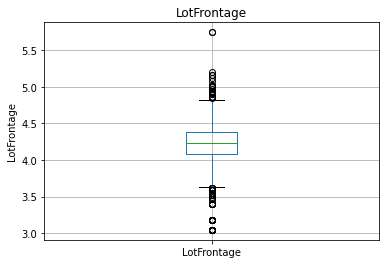

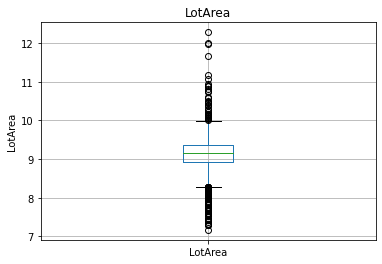

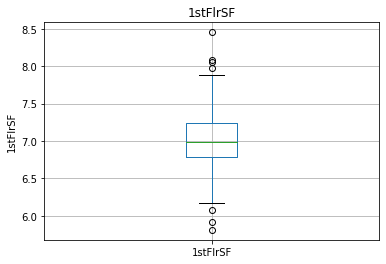

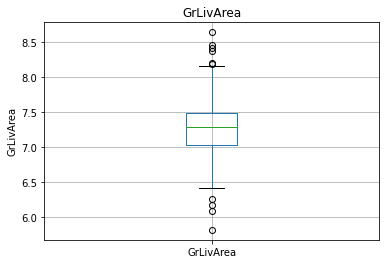

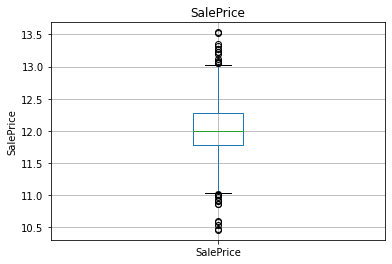

In [ ]:
for feature in con:
    d=df.copy()
    if 0 in d[feature].unique():
        pass
    else:
        d[feature]=np.log(d[feature])
        d.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Finding Categorical Features

In [ ]:
cat=[feature for feature in df.columns if df[feature].dtypes=='O']
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
df[cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


No of categories of each features

In [ ]:
for feature in cat:
    print("Feature:",feature,"Number of Categeries:",len(df[feature].unique()))

Feature: MSZoning Number of Categeries: 5
Feature: Street Number of Categeries: 2
Feature: Alley Number of Categeries: 3
Feature: LotShape Number of Categeries: 4
Feature: LandContour Number of Categeries: 4
Feature: Utilities Number of Categeries: 2
Feature: LotConfig Number of Categeries: 5
Feature: LandSlope Number of Categeries: 3
Feature: Neighborhood Number of Categeries: 25
Feature: Condition1 Number of Categeries: 9
Feature: Condition2 Number of Categeries: 8
Feature: BldgType Number of Categeries: 5
Feature: HouseStyle Number of Categeries: 8
Feature: RoofStyle Number of Categeries: 6
Feature: RoofMatl Number of Categeries: 8
Feature: Exterior1st Number of Categeries: 15
Feature: Exterior2nd Number of Categeries: 16
Feature: MasVnrType Number of Categeries: 5
Feature: ExterQual Number of Categeries: 4
Feature: ExterCond Number of Categeries: 5
Feature: Foundation Number of Categeries: 6
Feature: BsmtQual Number of Categeries: 5
Feature: BsmtCond Number of Categeries: 5
Feature

Plotting the Relation between SalesPrice And Categorical Features

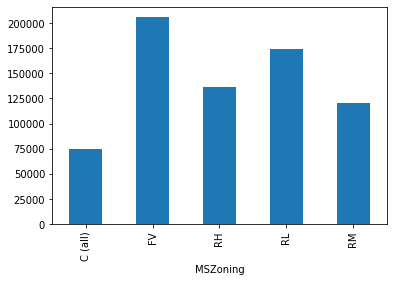

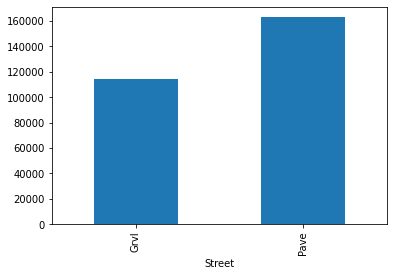

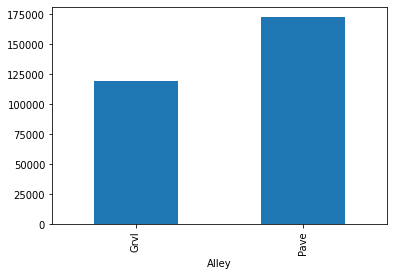

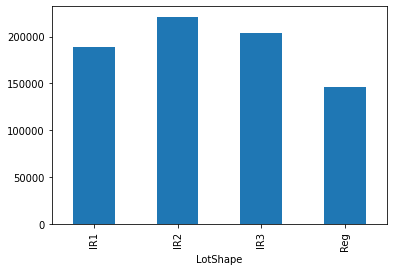

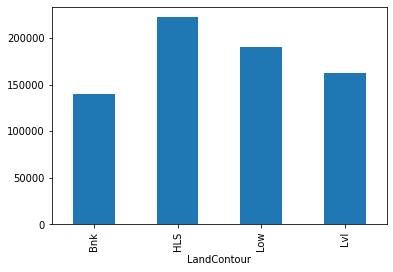

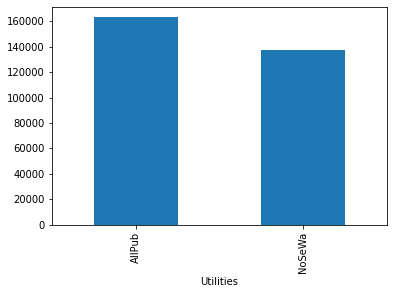

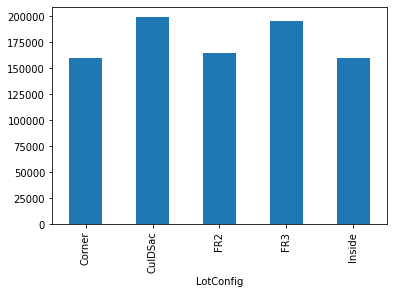

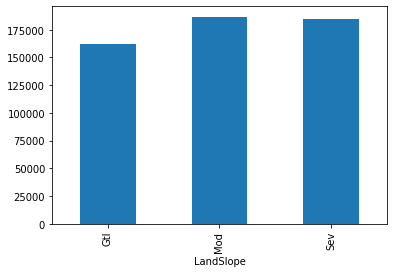

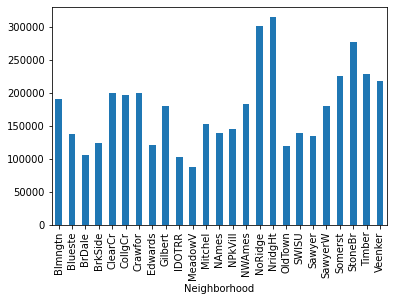

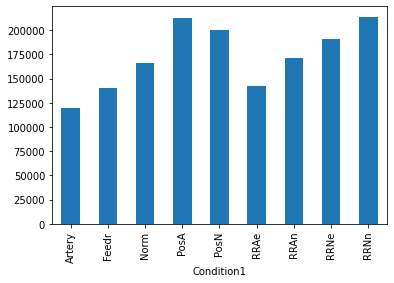

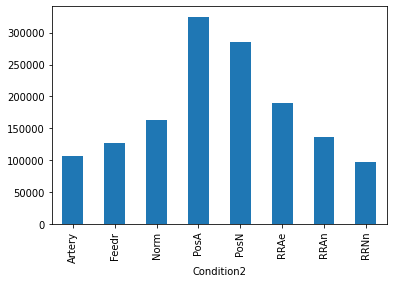

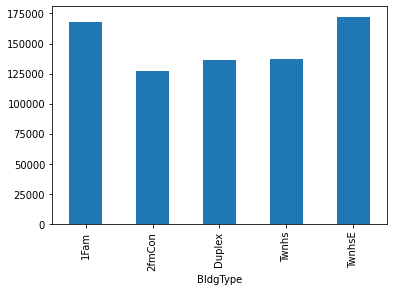

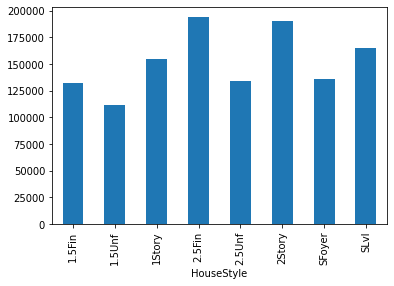

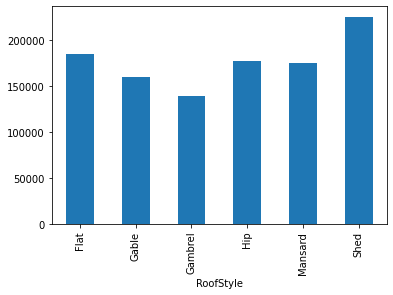

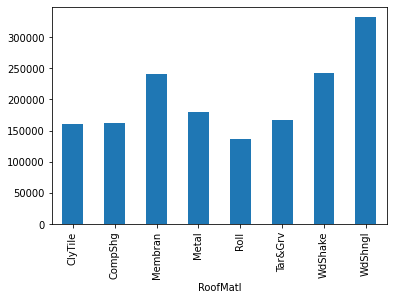

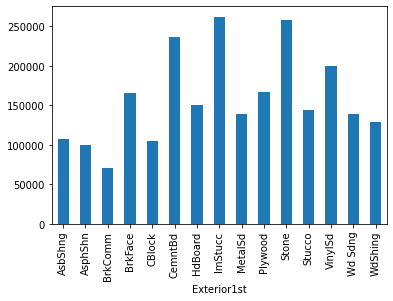

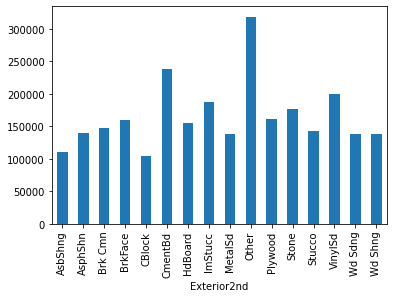

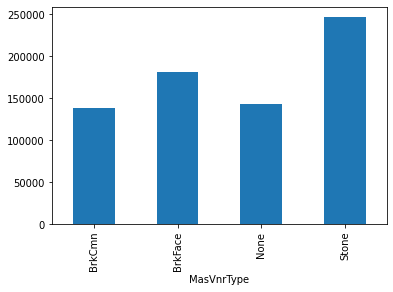

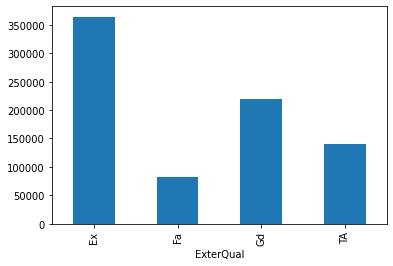

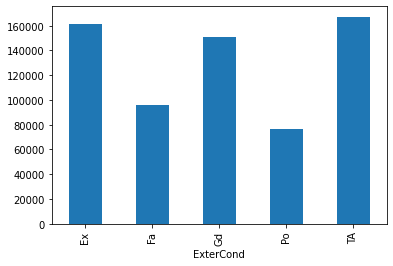

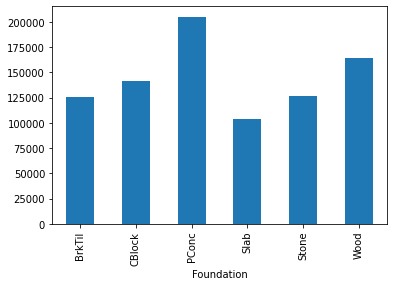

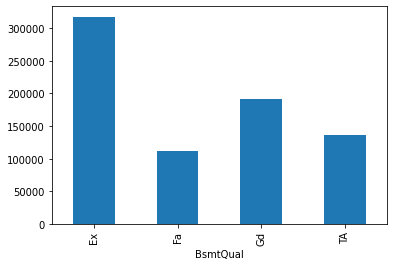

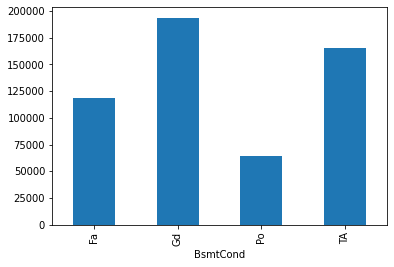

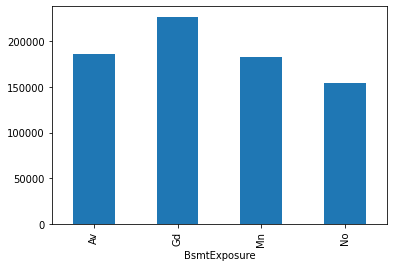

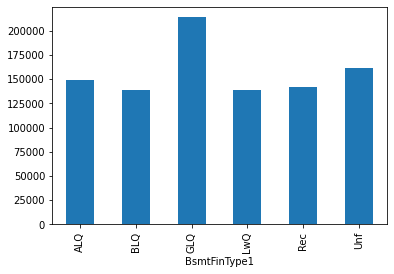

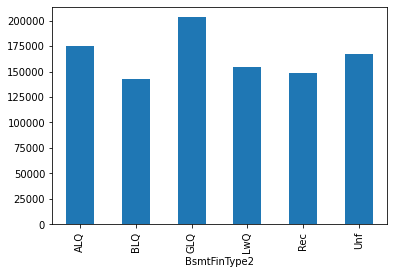

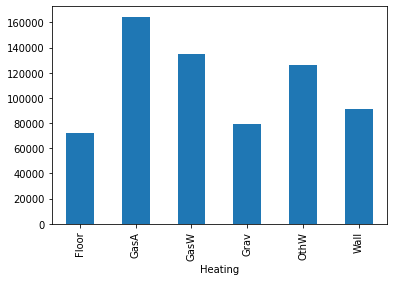

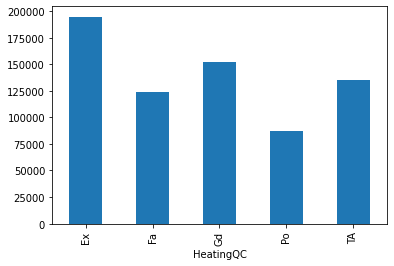

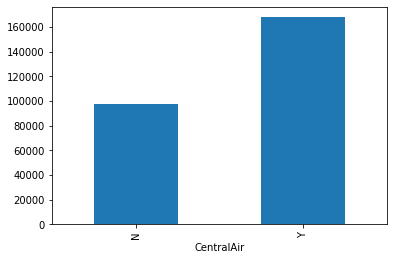

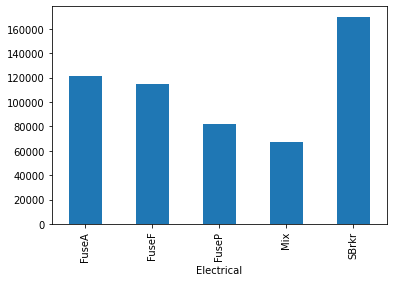

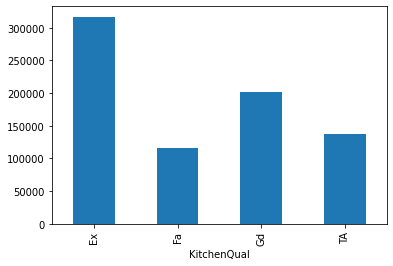

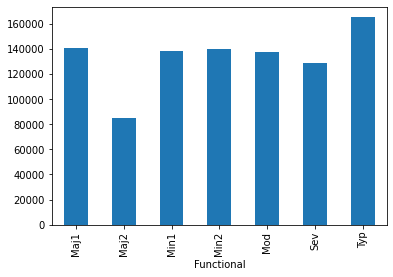

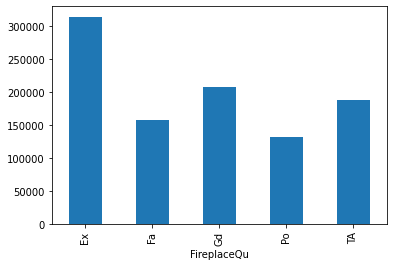

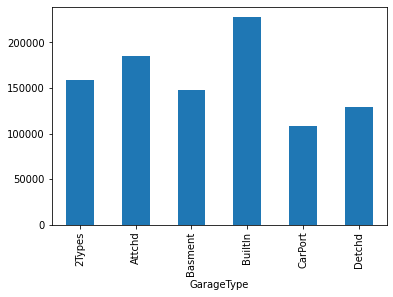

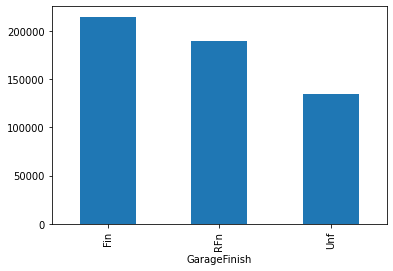

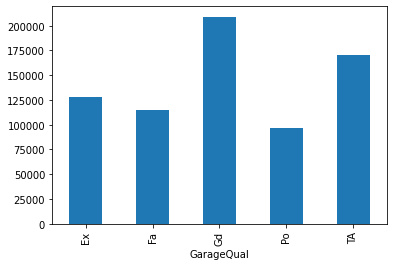

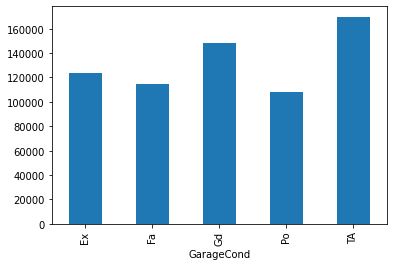

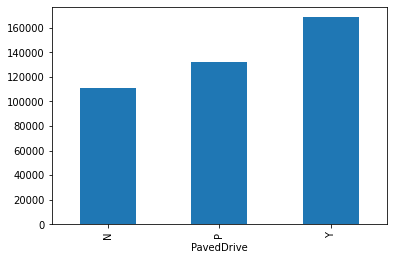

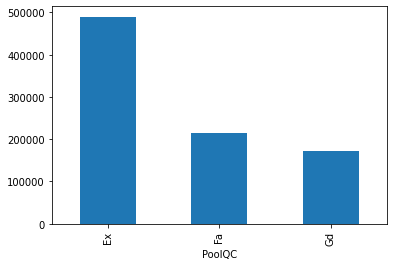

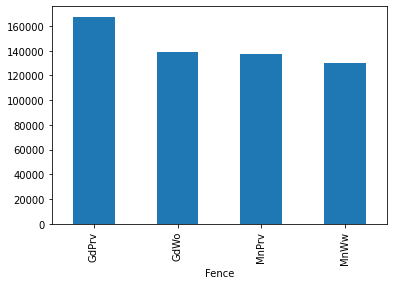

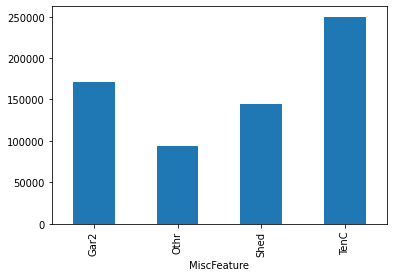

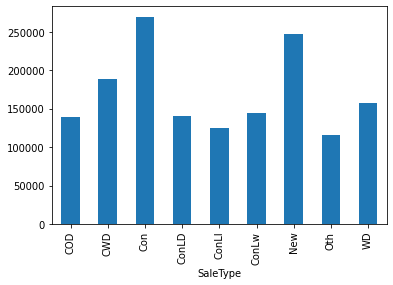

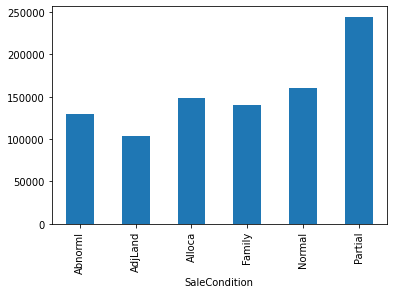

In [ ]:
for feature in cat:
  d=df.copy()
  d.groupby(feature)['SalePrice'].median().plot.bar()
  plt.show();


Handling Missing Numerical Features

In [ ]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype!='O']
for feature in feature_na:
  print(feature, np.round(df[feature].isnull().mean(),4))

LotFrontage 0.1774
MasVnrArea 0.0055
GarageYrBlt 0.0555


In [ ]:
for feature in feature_na:
    m=df[feature].median()
    df[feature].fillna(m,inplace=True)
    
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype=='O']
for feature in feature_na:
  print(feature, np.round(df[feature].isnull().mean(),4))



Alley 0.9377
MasVnrType 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
FireplaceQu 0.4726
GarageType 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


In [ ]:
def replace_na(df,feature_na):
    d=df.copy()
    d[feature_na]=d[feature_na].fillna('Missing')
    return d
d1=df.copy()
d1=replace_na(df,feature_na)
d1[feature_na].head()


,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Missing,BrkFace,Gd,TA,No,GLQ,Unf,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing
1,Missing,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
2,Missing,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
3,Missing,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,Missing,Missing,Missing
4,Missing,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing


In [ ]:
print("No of Missing Categorical features after Handling the missing values");
d1[feature_na].isnull().sum()

No of Missing Categorical features after Handling the missing values


Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
df[feature_na].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN


In [ ]:
for feature in cat:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Rare_var,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Rare_var,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Rare_var,Rare_var,Rare_var,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Rare_var,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Rare_var,Rare_var,Rare_var,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Rare_var,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Rare_var,Rare_var,Rare_var,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Rare_var,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Rare_var,Rare_var,Rare_var,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Rare_var,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Rare_var,Rare_var,Rare_var,0,12,2008,WD,Normal,250000


In [ ]:
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
for feature in cat:
  df[feature]=label_encoder.fit_transform(df[feature])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2,65.0,8450,0,2,3,3,0,3,0,4,2,0,0,2,7,5,2003,2003,0,0,8,8,1,196.0,1,3,2,2,3,3,2,706,5,0,150,856,0,...,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,4,0,2003.0,1,2,548,2,2,2,0,61,0,0,0,0,0,3,0,0,2,2008,3,2,208500
1,2,20,2,80.0,9600,0,2,3,3,0,2,0,16,1,0,0,1,6,8,1976,1976,0,0,4,4,2,0.0,3,3,1,2,3,1,0,978,5,0,284,1262,0,...,1,3,1262,0,0,1262,0,1,2,0,3,1,3,6,4,1,5,0,1976.0,1,2,460,2,2,2,298,0,0,0,0,0,0,3,0,0,5,2007,3,2,181500
2,3,60,2,68.0,11250,0,2,0,3,0,3,0,4,2,0,0,2,7,5,2001,2002,0,0,8,8,1,162.0,1,3,2,2,3,2,2,486,5,0,434,920,0,...,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,5,0,2001.0,1,2,608,2,2,2,0,42,0,0,0,0,0,3,0,0,9,2008,3,2,223500
3,4,70,2,60.0,9550,0,2,0,3,0,0,0,5,2,0,0,2,7,5,1915,1970,0,0,9,10,2,0.0,3,3,0,4,1,3,0,216,5,0,540,756,0,...,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,2,3,1998.0,3,3,642,2,2,2,0,35,272,0,0,0,0,3,0,0,2,2006,3,0,140000
4,5,60,2,84.0,14260,0,2,0,3,0,2,0,13,2,0,0,2,8,5,2000,2000,0,0,8,8,1,350.0,1,3,2,2,3,0,2,655,5,0,490,1145,0,...,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,5,0,2000.0,1,3,836,2,2,2,192,84,0,0,0,0,0,3,0,0,12,2008,3,2,250000


In [ ]:
con

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [ ]:
for feature in con :
  if 0 in df[feature].unique():
    pass
  else:
    df[feature]=np.log(df[feature])
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2,4.174387,9.041922,0,2,3,3,0,3,0,4,2,0,0,2,7,5,2003,2003,0,0,8,8,1,196.0,1,3,2,2,3,3,2,706,5,0,150,856,0,...,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,4,0,2003.0,1,2,548,2,2,2,0,61,0,0,0,0,0,3,0,0,2,2008,3,2,12.247694
1,2,20,2,4.382027,9.169518,0,2,3,3,0,2,0,16,1,0,0,1,6,8,1976,1976,0,0,4,4,2,0.0,3,3,1,2,3,1,0,978,5,0,284,1262,0,...,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,4,1,5,0,1976.0,1,2,460,2,2,2,298,0,0,0,0,0,0,3,0,0,5,2007,3,2,12.109011
2,3,60,2,4.219508,9.328123,0,2,0,3,0,3,0,4,2,0,0,2,7,5,2001,2002,0,0,8,8,1,162.0,1,3,2,2,3,2,2,486,5,0,434,920,0,...,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,5,0,2001.0,1,2,608,2,2,2,0,42,0,0,0,0,0,3,0,0,9,2008,3,2,12.317167
3,4,70,2,4.094345,9.164296,0,2,0,3,0,0,0,5,2,0,0,2,7,5,1915,1970,0,0,9,10,2,0.0,3,3,0,4,1,3,0,216,5,0,540,756,0,...,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,2,3,1998.0,3,3,642,2,2,2,0,35,272,0,0,0,0,3,0,0,2,2006,3,0,11.849398
4,5,60,2,4.430817,9.565214,0,2,0,3,0,2,0,13,2,0,0,2,8,5,2000,2000,0,0,8,8,1,350.0,1,3,2,2,3,0,2,655,5,0,490,1145,0,...,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,5,0,2000.0,1,3,836,2,2,2,192,84,0,0,0,0,0,3,0,0,12,2008,3,2,12.429216
5,6,50,2,4.442651,9.554993,0,2,0,3,0,3,0,10,2,0,0,0,5,5,1993,1995,0,0,8,8,2,0.0,3,3,3,2,3,3,2,732,5,0,64,796,0,...,1,3,6.679599,566,0,7.216709,1,0,1,1,1,1,3,5,4,0,4,0,1993.0,3,2,480,2,2,2,40,30,0,320,0,0,0,2,1,700,10,2009,3,2,11.870600
6,7,20,2,4.317488,9.218705,0,2,3,3,0,3,0,20,2,0,0,1,8,5,2004,2005,0,0,8,8,4,186.0,1,3,2,0,3,0,2,1369,5,0,317,1686,0,...,1,3,7.434848,0,0,7.434848,1,0,2,0,3,1,2,7,4,1,2,0,2004.0,1,2,636,2,2,2,255,57,0,0,0,0,0,3,0,0,8,2007,3,2,12.634603
7,8,60,2,4.234107,9.247829,0,2,0,3,0,0,0,12,3,0,0,2,7,6,1973,1973,0,0,3,3,4,240.0,3,3,1,2,3,2,0,859,1,32,216,1107,0,...,1,3,7.009409,983,0,7.644919,1,0,2,1,3,1,3,7,4,2,5,0,1973.0,1,2,484,2,2,2,235,204,228,0,0,0,0,3,1,350,11,2009,3,2,12.206073
8,9,50,3,3.931826,8.719317,0,2,3,3,0,3,0,15,0,0,0,0,7,5,1931,1950,0,0,1,10,2,0.0,3,3,0,4,3,3,6,0,5,0,952,952,0,...,1,1,6.929517,752,0,7.480992,0,0,2,0,2,2,3,8,0,2,5,3,1931.0,3,2,468,0,2,2,90,0,205,0,0,0,0,3,0,0,4,2008,3,0,11.774520
9,10,190,2,3.912023,8.911934,0,2,3,3,0,0,0,2,0,1,1,3,5,6,1939,1950,0,0,4,4,2,0.0,3,3,0,4,3,3,2,851,5,0,140,991,0,...,1,3,6.981935,0,0,6.981935,1,0,1,0,2,2,3,5,4,2,5,0,1939.0,1,1,205,1,2,2,0,4,0,0,0,0,0,3,0,0,1,2008,3,2,11.678440


In [ ]:
for feature in date:
       
    df[feature]=df['YrSold']-df[feature]

Train Test Split And Feature Scaling

In [ ]:
feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]
from sklearn.model_selection import train_test_split 
X=df.iloc[:,1:-1]
y=df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train[feature_scale])
scaler.transform(X_test[feature_scale])


array([[ 0.07765223, -0.11400244,  0.56635804, ...,  0.        ,
         0.37500805,  0.07532839],
       [ 0.4342622 , -0.11400244, -0.32756546, ...,  0.        ,
         0.37500805,  0.07532839],
       [-0.8733077 , -0.11400244,  0.10672119, ...,  0.        ,
         0.37500805,  0.07532839],
       ...,
       [-0.63556772, -0.11400244, -0.32756546, ...,  0.        ,
         0.37500805,  0.07532839],
       [-0.63556772, -0.11400244,  0.75473883, ...,  0.        ,
        -3.65575332, -3.01181391],
       [ 0.07765223, -3.52822938,  0.75473883, ...,  0.        ,
        -2.3121662 ,  1.61889953]])

Feature Selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel.fit(X_train, y_train)
selected_feature = X_train.columns[(feature_sel.get_support())]
selected_feature

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold',
       'SaleCondition'],
      dtype='object')

In [ ]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feature)))

total features: 79
selected features: 41


Linear Regression

In [ ]:
X_train=X_train[selected_feature]
X_test=X_test[selected_feature]
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
p=reg.predict(X_test)


Accuracy

In [ ]:
SS_Residual = sum((p-y_test)**2)       
SS_Total = sum((p-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adj=1-(1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj)

0.8350551168564738


Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)
p=reg.predict(X_test)

Accuracy

In [ ]:
SS_Residual = sum((p-y_test)**2)       
SS_Total = sum((p-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adj=1-(1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj

0.6519993269308385

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)
p=reg.predict(X_test)

Accuracy

In [ ]:
SS_Residual = sum((p-y_test)**2)       
SS_Total = sum((p-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adj=1-(1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj

0.6197933372018183